In [1]:
# check for data file
import os

In [2]:
print(os.listdir())

['.ipynb_checkpoints', '911.csv', '911_Analysis.ipynb']


In [3]:
#  Import all major libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# usage of inline ploting
%matplotlib inline

In [5]:
dataFrame = pd.read_csv('911.csv')

In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [31]:
dataframe = dataFrame.head()

In [32]:
# top 5 zip codes
dataFrame['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [33]:
dataFrame['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [34]:
dataFrame['title'].nunique()

131

In [46]:
# Top five spefic reasons to call 911
dataFrame['speficReason'] = dataFrame['title'].apply(lambda title : title.split(':')[0])

In [47]:
dataFrame['speficReason'].value_counts().head()

EMS        144362
Traffic    101889
Fire        42989
Name: speficReason, dtype: int64

<AxesSubplot:xlabel='speficReason', ylabel='count'>

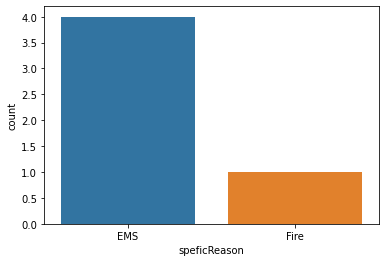

In [48]:
df = dataFrame.head()
sns.countplot(x='speficReason', data=df)

In [49]:
dataFrame['timeStamp'] = pd.to_datetime(dataFrame['timeStamp'])

In [50]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   lat           289240 non-null  float64       
 1   lng           289240 non-null  float64       
 2   desc          289240 non-null  object        
 3   zip           253942 non-null  float64       
 4   title         289240 non-null  object        
 5   timeStamp     289240 non-null  datetime64[ns]
 6   twp           289137 non-null  object        
 7   addr          289240 non-null  object        
 8   e             289240 non-null  int64         
 9   speficReason  289240 non-null  object        
 10  Hours         289240 non-null  int64         
 11  Months        289240 non-null  int64         
 12  Day           289240 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 28.7+ MB


In [51]:
# create columns for Hour, Months, and day of week. 

In [52]:
dataFrame['Hours'] = dataFrame['timeStamp'].apply(lambda time: time.hour)

In [53]:
dataFrame['Months'] = dataFrame['timeStamp'].apply(lambda time: time.month)
dataFrame['Day'] = dataFrame['timeStamp'].apply(lambda time: time.dayofweek)

In [54]:
dataFrame['Hours'].nunique()

24

<AxesSubplot:xlabel='Months', ylabel='count'>

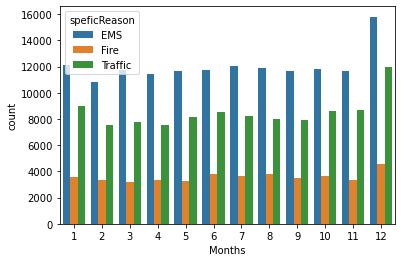

In [55]:
sns.countplot(x='Months', data=dataFrame,hue='speficReason')

In [59]:
# use groupby
byMonth = dataFrame.groupby('Day').count()

In [60]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,speficReason,Hours,Months
Day,,,,,,,,,,,,
0,42092,42092,42092,37030,42092,42092,42081,42092,42092,42092,42092,42092
1,43744,43744,43744,38385,43744,43744,43731,43744,43744,43744,43744,43744
2,43442,43442,43442,38327,43442,43442,43422,43442,43442,43442,43442,43442
3,42784,42784,42784,37616,42784,42784,42770,42784,42784,42784,42784,42784
4,44468,44468,44468,38923,44468,44468,44450,44468,44468,44468,44468,44468


<AxesSubplot:xlabel='Day'>

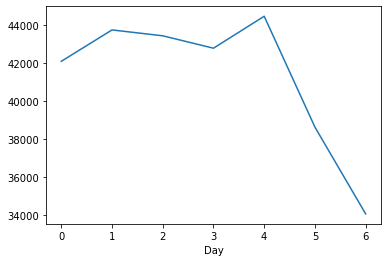

In [61]:
byMonth['twp'].plot()